In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(x_train, _),(x_test, _) = mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

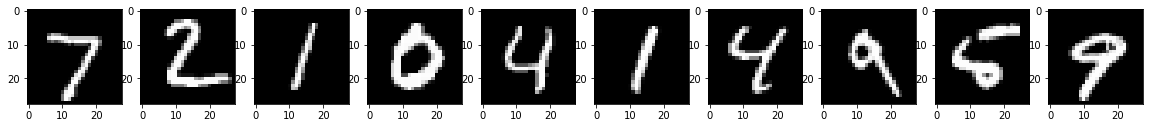

In [4]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

plt.show()

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [6]:
input_img = Input(shape=(28,28,1))

### Encoder

In [9]:
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)
print(x.shape)

(None, 14, 14, 16)


In [10]:
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
print(x.shape)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 
print(x.shape)

(None, 14, 14, 8)
(None, 7, 7, 8)


In [29]:
x = Conv2D(filters = 8, kernel_size =(3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

### Decoder

In [30]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

In [31]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

In [32]:
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [33]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [34]:
# Train the model
autoencoder.fit(x_train, x_train,
                batch_size=128,
                epochs=200,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

Epoch 1/200
469/469 [==============================] - 3s 7ms/step - loss: -493.5016 - val_loss: -508.4319
Epoch 2/200
469/469 [==============================] - 3s 7ms/step - loss: -501.6667 - val_loss: -509.2479
Epoch 3/200
469/469 [==============================] - 3s 7ms/step - loss: -502.2004 - val_loss: -509.5442
Epoch 4/200
469/469 [==============================] - 3s 7ms/step - loss: -502.4966 - val_loss: -509.8144
Epoch 5/200
469/469 [==============================] - 3s 7ms/step - loss: -502.6894 - val_loss: -509.9836
Epoch 6/200
469/469 [==============================] - 3s 7ms/step - loss: -502.8187 - val_loss: -510.0497
Epoch 7/200
469/469 [==============================] - 3s 7ms/step - loss: -502.9091 - val_loss: -510.1775
Epoch 8/200
469/469 [==============================] - 3s 7ms/step - loss: -502.9841 - val_loss: -510.1695
Epoch 9/200
469/469 [==============================] - 3s 7ms/step - loss: -503.0563 - val_loss: -510.2892
Epoch 10/200
469/469 [===============

Epoch 77/200
469/469 [==============================] - 3s 7ms/step - loss: -503.9021 - val_loss: -511.0843
Epoch 78/200
469/469 [==============================] - 3s 7ms/step - loss: -503.8980 - val_loss: -511.0916
Epoch 79/200
469/469 [==============================] - 3s 7ms/step - loss: -503.8967 - val_loss: -511.0594
Epoch 80/200
469/469 [==============================] - 3s 7ms/step - loss: -503.9111 - val_loss: -511.0695
Epoch 81/200
469/469 [==============================] - 3s 7ms/step - loss: -503.9080 - val_loss: -511.0868
Epoch 82/200
469/469 [==============================] - 3s 7ms/step - loss: -503.9090 - val_loss: -511.0786
Epoch 83/200
469/469 [==============================] - 3s 7ms/step - loss: -503.9168 - val_loss: -511.0835
Epoch 84/200
469/469 [==============================] - 3s 7ms/step - loss: -503.9161 - val_loss: -511.0836
Epoch 85/200
469/469 [==============================] - 3s 7ms/step - loss: -503.9280 - val_loss: -511.1154
Epoch 86/200
469/469 [======

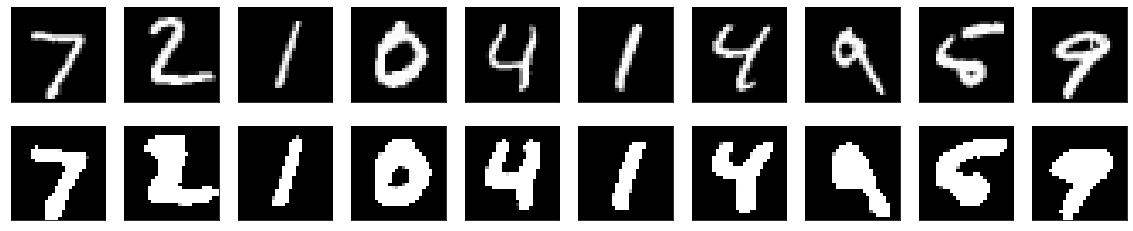

In [35]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [36]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

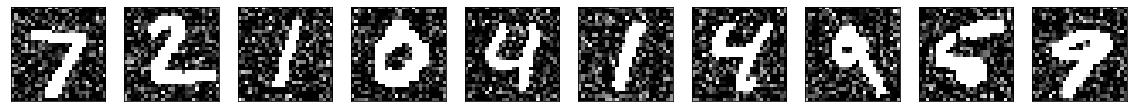

In [37]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [38]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=150,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test)
               )

Epoch 1/150
469/469 [==============================] - 4s 8ms/step - loss: 513.9349 - val_loss: 521.2279
Epoch 2/150
469/469 [==============================] - 3s 7ms/step - loss: 513.9350 - val_loss: 521.2279
Epoch 3/150
469/469 [==============================] - 3s 7ms/step - loss: 513.9352 - val_loss: 521.2279
Epoch 4/150
469/469 [==============================] - 3s 7ms/step - loss: 513.9351 - val_loss: 521.2279
Epoch 5/150
469/469 [==============================] - 3s 7ms/step - loss: 513.9346 - val_loss: 521.2279
Epoch 6/150
469/469 [==============================] - 3s 7ms/step - loss: 513.9349 - val_loss: 521.2279
Epoch 7/150
469/469 [==============================] - 3s 7ms/step - loss: 513.9349 - val_loss: 521.2279
Epoch 8/150
469/469 [==============================] - 3s 7ms/step - loss: 513.9349 - val_loss: 521.2279
Epoch 9/150
469/469 [==============================] - 3s 7ms/step - loss: 513.9347 - val_loss: 521.2279
Epoch 10/150
469/469 [==============================] -

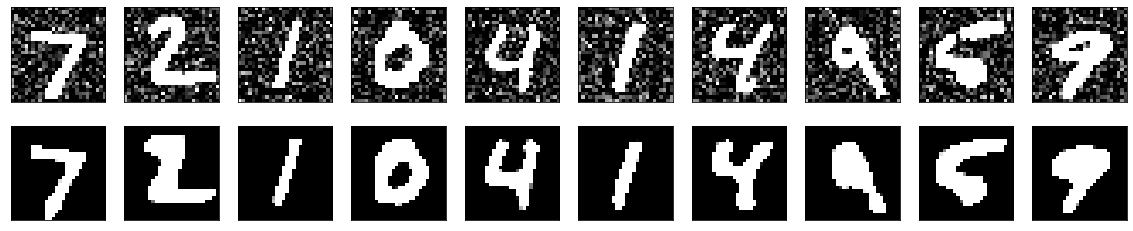

In [39]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [40]:
print(autoencoder.summary())

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)          